In [2]:
import math
import warnings

warnings.filterwarnings("ignore")

import sklearn.datasets
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

###   t-SNE, UMAP and LargeVis

In this and the next notebook we will use manifold learning for data visualization of large data sets (with high dimensionality). In addition to t-SNE, two relatively new methods will be used that are more efficient on large data sets.


- UMAP (Uniform Manifold Approximation and Projection) - Install this Python package: https://umap-learn.readthedocs.io/en/latest/index.html. UMAP package is compatible with scikit-learn, making use of the same API and able to be added to sklearn pipelines. UMAP can work as a drop in replacement for t-SNE and other dimension reduction classes from scikit-learn


- LargeVis (Visualizing Large-scale and High-dimensional Data) - Many techniques (like t-SNE, UMAP and LargeVis) first compute a similarity structure of the data points and then project them into a low-dimensional space with the structure preserved. These two steps suffer from considerable computational costs Comparing to tSNE, LargeVis significantly reduces the computational cost of the graph construction step and employs a principled probabilistic model for the visualization step, the objective of which can be effectively optimized through asynchronous stochastic gradient descent with a linear time complexity. Download this algorithm repository and follow the installation instructions. https://github.com/lferry007/LargeVis


In [3]:
from sklearn.manifold import TSNE
import umap.umap_ as umap

To get data we use the sklearn.datasets.fetch_openml method, which as the name requires, Fetch dataset from openml by name or dataset id. We will use MNIST and Fashion-MNIST(Zalando's article images). Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. Instead of numbers it contains thumbnails of clothes images.

In [4]:
mnist = sklearn.datasets.fetch_openml('mnist_784', version=1, as_frame=False)
fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST', version=1, as_frame=False)

Below are drawings of some samples from mnist and fmnist data sets

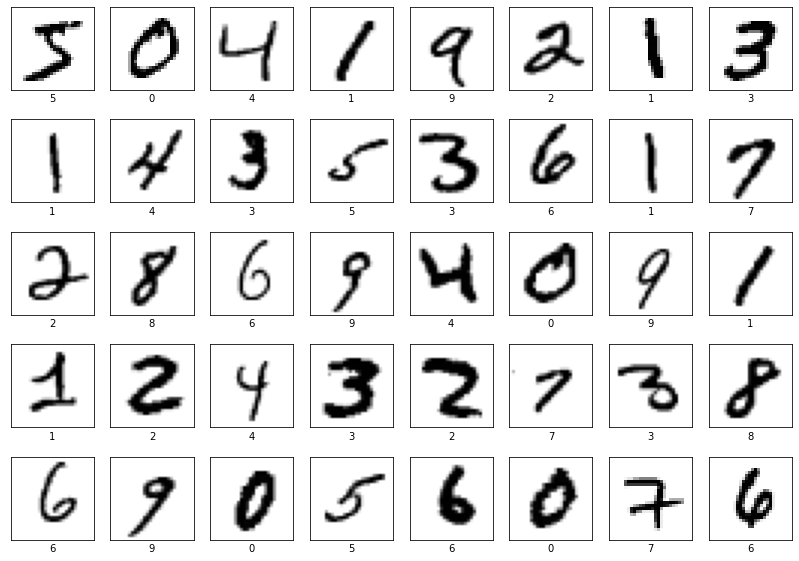

In [5]:
mnist_names = [i for i in range(10)]

plt.figure(figsize=(14, 10))
for i in range(40):
    plt.subplot(5, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mnist.data[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(mnist_names[int(mnist.target[i])])
plt.show()

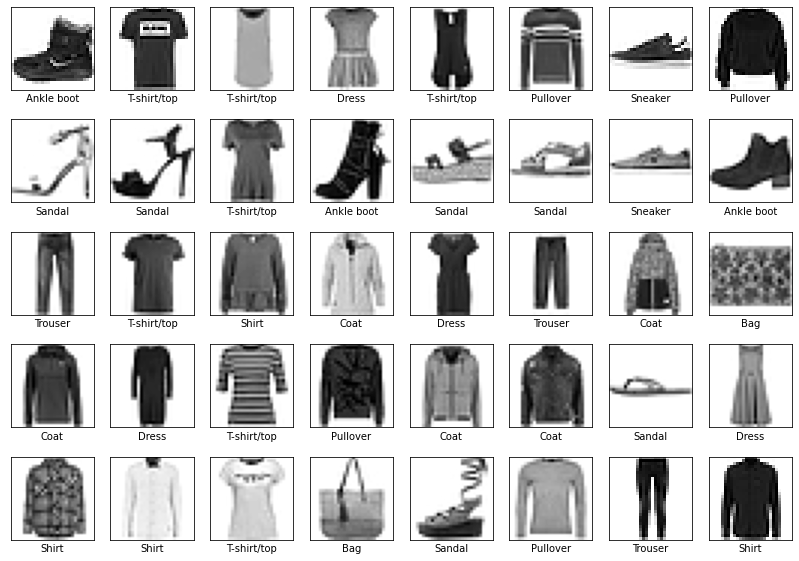

In [6]:
fmnist_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(14, 10))
for i in range(40):
    plt.subplot(5, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fmnist.data[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(fmnist_names[int(fmnist.target[i])])
plt.show()

#### Use t-SNE, UMAP and LargeVis to project mnist and fmnist data sets into a 2-dimensional space. For LargeVis, you need to create a function that saves the data to the required by LargeVis txt file format, and a function that loads the resulting file. Draw charts for all visualizations.

In [7]:
def dataset_to_df(dataset, amount=10000):
    X = dataset.data / 255.0
    y = dataset.target
    print(X.shape, y.shape)
    feat_cols = ['pixel' + str(i) for i in range(0, X.shape[1])]
    df = pd.DataFrame(X[0:amount], columns=feat_cols)
    df['y'] = y[0:amount]
    return df


def visualize_embedding(df, embedding):
    df['2d-one'] = embedding[:,0]
    df['2d-two'] = embedding[:,1]
    plt.figure(figsize=(16, 10))
    sn.scatterplot(
        x="2d-one", y="2d-two",
        hue="y",
        palette=sn.color_palette("hls", 10),
        data=df,
        legend="full",
        alpha=0.3)

TSNE implementation

In [8]:
def execute_tsne(df):
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(df)
    return tsne_results

UMAP implementation

In [9]:
def execute_umap(df):
    reducer = umap.UMAP(random_state=42)
    umap_result = reducer.fit_transform(df)
    return umap_result

LargeVis Implementation

In [10]:
import os

In [11]:
def save_df_as_txt(df):
    input_path = "data.txt"
    pixels_df = df[df.columns.difference(['y'])]
    file_header = str(len(pixels_df)) + ' ' + str(len(pixels_df.columns)) + '\n'
    np.savetxt(input_path, pixels_df.values, fmt='%s')
    with open(input_path, 'r') as original: data = original.read()
    with open(input_path, 'w') as modified: modified.write(file_header + data)
    return input_path

In [12]:
def execute_large_vis(df):
    input_file = save_df_as_txt(df)
    command = "python LargeVis_run.py -input " + input_file + " -output result.txt -threads 6 -fea 1"
    os.system(command)
    result_df = pd.read_csv('result.txt', delim_whitespace=True)
    result_df.columns = ['x', 'y']
    result_numpy = np.empty((10000,2))
    result_numpy[:, 0] = result_df['x'].tolist()
    result_numpy[:, 1] = result_df['y'].tolist()
    return result_numpy

# Apply Algorithms on MNIST dataset

In [13]:
mnist_df = dataset_to_df(mnist)
mnist_df.head(5)

(70000, 784) (70000,)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


(70000, 784) (70000,)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.004s...
[t-SNE] Computed neighbors for 10000 samples in 2.048s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.196285
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.331558
[t-SNE] KL divergence after 300 iterations: 2.581302


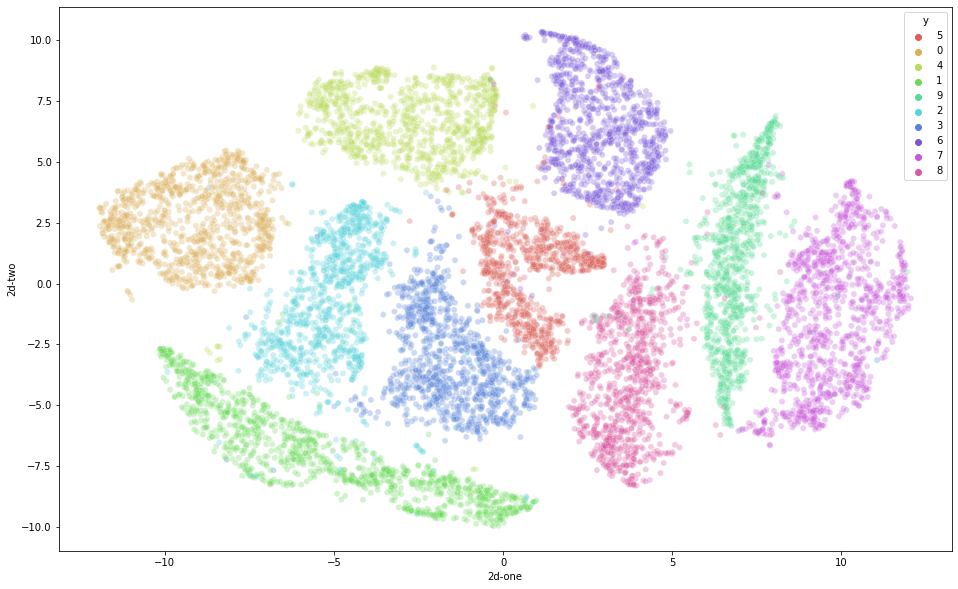

In [14]:
tsne_result_mnist = execute_tsne(dataset_to_df(mnist))
visualize_embedding(mnist_df, tsne_result_mnist)

Jak widać TSNE w bardzo dobry sposób rozdzielił dane na 10 klas. Dane są dobrze odseparowane, mamo bardzo dobrze widoczne 10 grup, klasy nie sa wymieszane.
Niestety TSNE nie mówi nam nic o globalności, nie możemy wskazać jak bardzo dane klasy są od siebie oddalone/różne.

(70000, 784) (70000,)


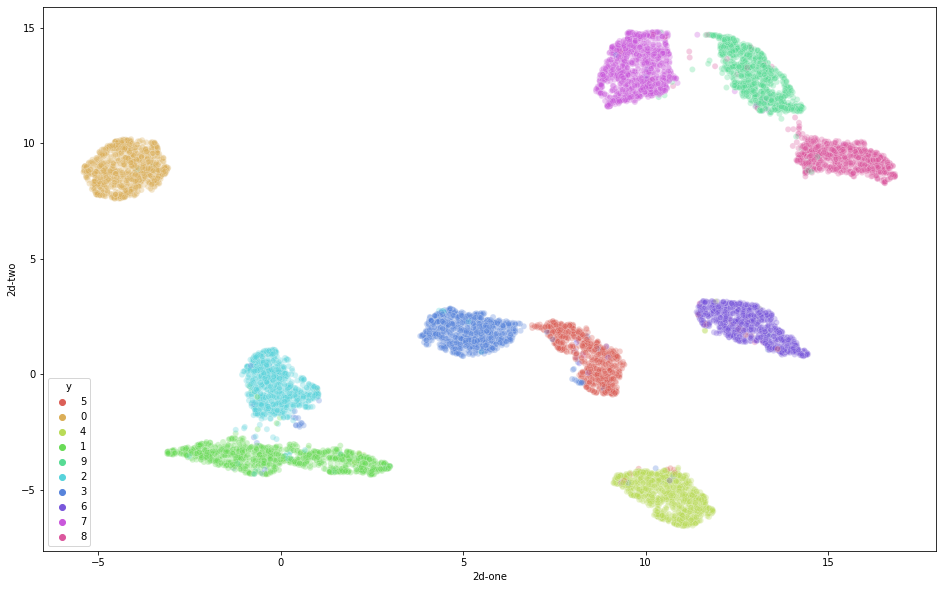

In [15]:
umap_result_mnist = execute_umap(dataset_to_df(mnist))
visualize_embedding(mnist_df, umap_result_mnist)

UMAP podobnie jak TSNE bardzo dobrze poradził sobie z rozdzieleniem danych na 10 klas. Jego zaleta względem TSNE jest to, że jest tutaj uwzględniona globalność i możemy wskazać które klasy są do siebie podobne a które nie. Widać np. że 9, 7 i 8 znajdują się blisko siebie, a bardzo oddalone są np. 0 i 4.

(70000, 784) (70000,)
LargeVis successfully imported!
Reading input file data.txt ...... Done.
Total vertices : 10000	Dimension : 784
Normalizing ...... Done.
Running ANNOY ...... Done.
Running propagation 3/3
Test knn accuracy : 99.99%
Computing similarities ...... Done.
Fitting model	Alpha: 0.000100 Progress: 100.000%


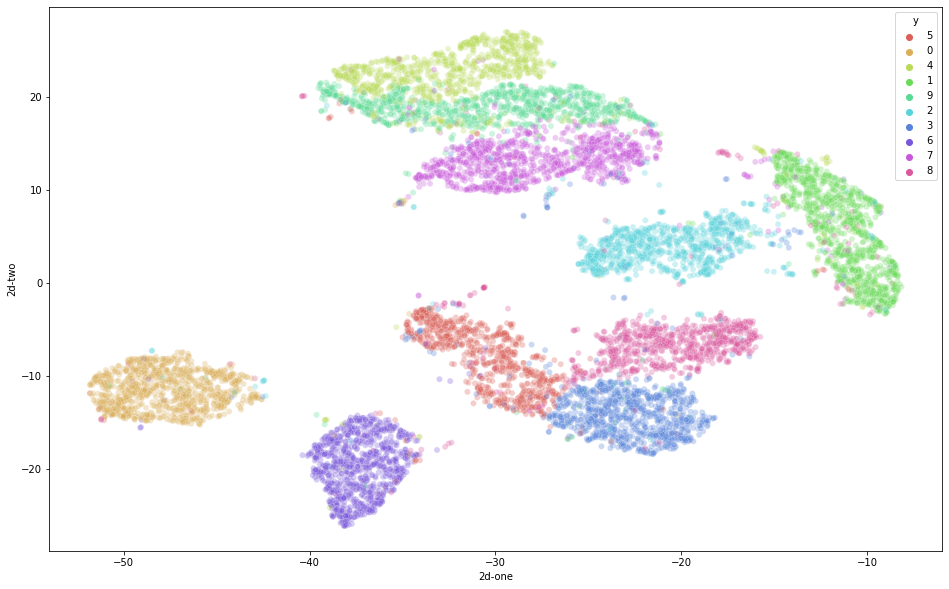

In [16]:
large_vis_result_mnist = execute_large_vis(dataset_to_df(mnist))
visualize_embedding(mnist_df, large_vis_result_mnist)

Wydaje się, że LargeVis jest czymś pomiędzy TSNE a UMAP, tj. dba o lokalność ale bierze również pod uwagę globalność. Widzimy, że pojedyńcze punkty są czasami 'zagubione', zostały przydzielone do niepoprawnej klasy.

In [17]:
mnist_result = {
    'TSNE': tsne_result_mnist,
    'UMAP': umap_result_mnist,
    'LARGE_VIS': large_vis_result_mnist
}

# Apply Algorithms on Fashion MNIST dataset

In [18]:
fashion_mnist_df = dataset_to_df(fmnist)
fashion_mnist_df.head(5)

(70000, 784) (70000,)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0


(70000, 784) (70000,)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.004s...
[t-SNE] Computed neighbors for 10000 samples in 2.523s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.866560
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.502060
[t-SNE] KL divergence after 300 iterations: 2.467512


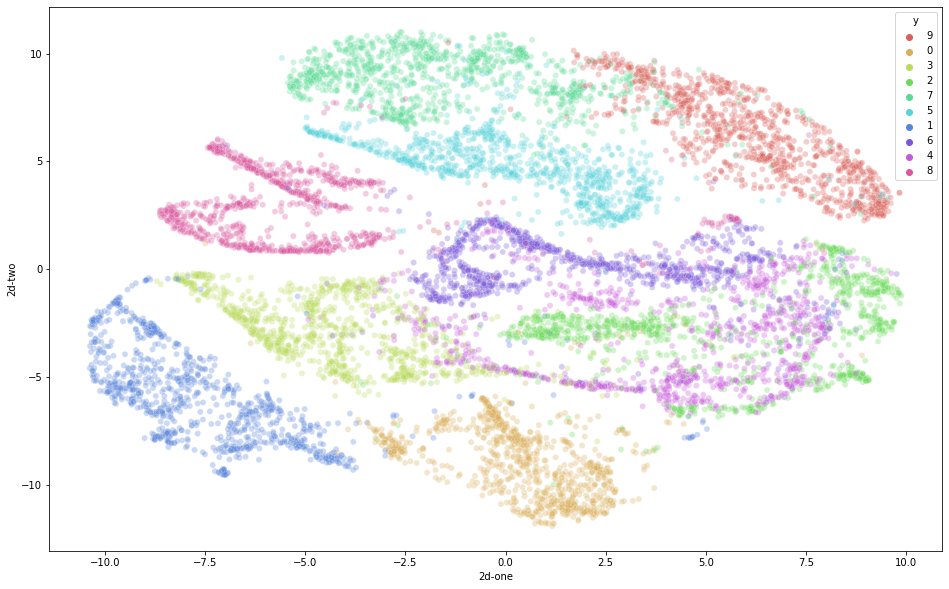

In [19]:
tsne_result_fmnist = execute_tsne(dataset_to_df(fmnist))
visualize_embedding(fashion_mnist_df, tsne_result_fmnist)

(70000, 784) (70000,)


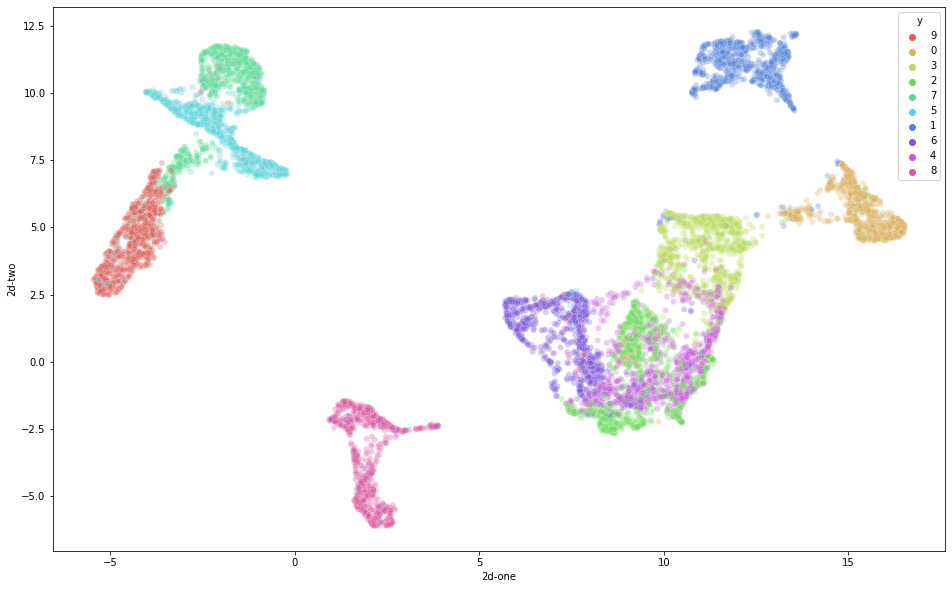

In [20]:
umap_result_fmnist = execute_umap(dataset_to_df(fmnist))
visualize_embedding(fashion_mnist_df, umap_result_fmnist)

(70000, 784) (70000,)
LargeVis successfully imported!
Reading input file data.txt ...... Done.
Total vertices : 10000	Dimension : 784
Normalizing ...... Done.
Running ANNOY ...... Done.
Running propagation 3/3
Test knn accuracy : 100.00%
Computing similarities ...... Done.
Fitting model	Alpha: 0.000100 Progress: 100.000%


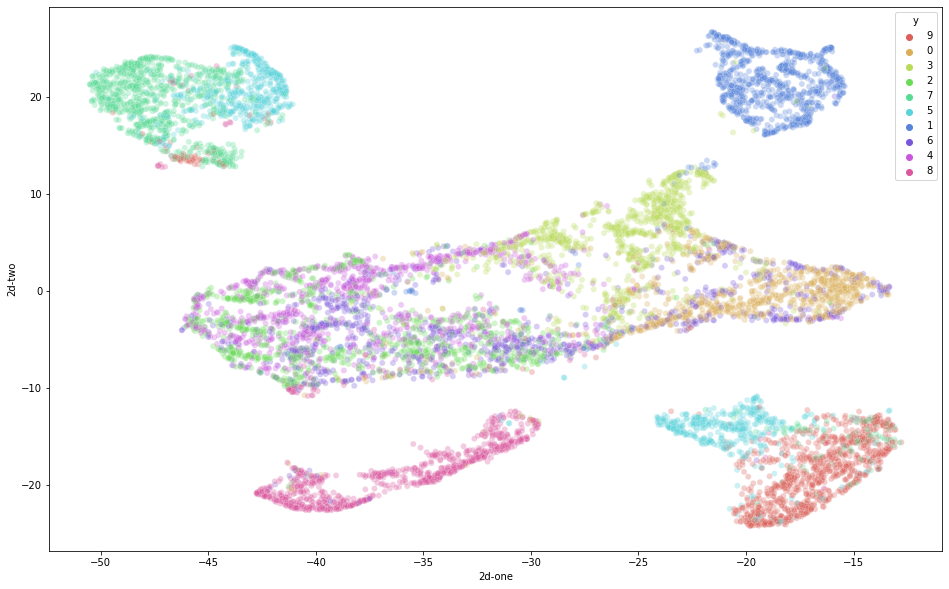

In [21]:
large_vis_result_fmnist = execute_large_vis(dataset_to_df(fmnist))
visualize_embedding(fashion_mnist_df, large_vis_result_fmnist)

Dla zbioru Fashion MNIST LargeVis poradził sobie najgorzej. Na środku zdjęcia możemy wyróżnić dużo klas, które są wymieszane.

In [22]:
fashion_mnist_result = {
    'TSNE': tsne_result_fmnist,
    'UMAP': umap_result_fmnist,
    'LARGE_VIS': large_vis_result_fmnist
}

# Use Euclidian Metric

In [23]:
import math
import random
from statistics import mean

In [24]:
def euclidian_distance(point1, point2):
    x1, y1 = point1[0], point2[1]
    x2, y2 = point2[0], point2[1]
    distance = math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
    return distance

In [25]:
def calculate_avg_distance(method_result, df, selected_label=None, samples=500):
    distances = []
    samples = random.sample(list(zip(method_result, df['y'])), samples)

    for point1, label1 in samples:
        for point2, label2 in samples:
            if selected_label is None and label1 != label2:
                distance = euclidian_distance(point1, point2)
                distances.append(distance)
            if label1 == label2 == selected_label:
                distance = euclidian_distance(point1, point2)
                distances.append(distance)

    return mean(distances)

In [26]:
def compute_euclidian_metric(method_result, df, labels=10):
    avg_distance_between_all_labels = calculate_avg_distance(method_result, df)
    distance_specific_label = []

    for i in range(0, labels):
        distance = calculate_avg_distance(method_result, df, str(i))
        distance_specific_label.append(distance)

    avg_distance_for_specific_labels = mean(distance_specific_label)
    return avg_distance_for_specific_labels / avg_distance_between_all_labels

In [27]:
# Calculate euclidian metric on MNIST Dataset
for key, value in mnist_result.items():
    metric_value = compute_euclidian_metric(value, mnist_df)
    print(f'Method: {key}, euclidian metric value: {metric_value}')

Method: TSNE, euclidian metric value: 0.194185006648411
Method: UMAP, euclidian metric value: 0.12196371657648511
Method: LARGE_VIS, euclidian metric value: 0.26014579977739916


In [28]:
# Calculate euclidian metric on Fashion MNIST Dataset
for key, value in fashion_mnist_result.items():
    metric_value = compute_euclidian_metric(value, fashion_mnist_df)
    print(f'Method: {key}, euclidian metric value: {metric_value}')

Method: TSNE, euclidian metric value: 0.4391604168778261
Method: UMAP, euclidian metric value: 0.12688298027036482
Method: LARGE_VIS, euclidian metric value: 0.4609251922747935


Widać, że najlepszą wartość uzyskał UMAP, a na drugim miejscu jest TSNE. Wartości metryk pokrywają się z tym, co widzieliśmy na wykresach. Chociaż wydaje się, że ta metryka bardziej patrzy na lokalność niż globalność (słaby wynik LargeVis dla zbioru MNIST).

# Metrics From Teacher

In [31]:
import numba
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from scipy.spatial.distance import squareform, pdist
from sklearn.model_selection import train_test_split

markers = ["x", "o", "s", "*", "^", ".", "X"]
colors = ["red", "blue", "green", "brown", "orange", "cyan", "grey", "purple"]


@numba.jit(nopython=True)
def knngain(d_hd, d_ld, labels):
    # Number of data points
    N = d_hd.shape[0]
    N_1 = N - 1
    k_hd = np.zeros(shape=N_1, dtype=np.int64)
    k_ld = np.zeros(shape=N_1, dtype=np.int64)
    # For each data point
    for i in range(N):
        c_i = labels[i]
        di_hd = d_hd[i, :].argsort(kind="mergesort")
        di_ld = d_ld[i, :].argsort(kind="mergesort")
        # Making sure that i is first in di_hd and di_ld
        for arr in [di_hd, di_ld]:
            for idj, j in enumerate(arr):
                if j == i:
                    idi = idj
                    break
            if idi != 0:
                arr[idi] = arr[0]
            arr = arr[1:]
        for k in range(N_1):
            if c_i == labels[di_hd[k]]:
                k_hd[k] += 1
            if c_i == labels[di_ld[k]]:
                k_ld[k] += 1
    # Computing the KNN gain
    gn = (k_ld.cumsum() - k_hd.cumsum()).astype(np.float64) / (
        (1.0 + np.arange(N_1)) * N
    )
    # Returning the KNN gain and its AUC
    return gn, eval_auc(gn)


@numba.jit(nopython=True)
def eval_auc(arr):
    i_all_k = 1.0 / (np.arange(arr.size) + 1.0)
    return np.float64(arr.dot(i_all_k)) / (i_all_k.sum())


@numba.jit(nopython=True)
def eval_rnx(Q):
    N_1 = Q.shape[0]
    N = N_1 + 1
    # Computing Q_NX
    qnxk = np.empty(shape=N_1, dtype=np.float64)
    acc_q = 0.0
    for K in range(N_1):
        acc_q += Q[K, K] + np.sum(Q[K, :K]) + np.sum(Q[:K, K])
        qnxk[K] = acc_q / ((K + 1) * N)
    # Computing R_NX
    arr_K = np.arange(N_1)[1:].astype(np.float64)
    rnxk = (N_1 * qnxk[: N_1 - 1] - arr_K) / (N_1 - arr_K)
    # Returning
    return rnxk


def eval_dr_quality(d_hd, d_ld):
    # Computing the co-ranking matrix of the embedding, and the R_{NX}(K) curve.
    rnxk = eval_rnx(Q=coranking(d_hd=d_hd, d_ld=d_ld))
    # Computing the AUC, and returning.
    return rnxk, eval_auc(rnxk)


def coranking(d_hd, d_ld):
    # Computing the permutations to sort the rows of the distance matrices in HDS and LDS.
    perm_hd = d_hd.argsort(axis=-1, kind="mergesort")
    perm_ld = d_ld.argsort(axis=-1, kind="mergesort")

    N = d_hd.shape[0]
    i = np.arange(N, dtype=np.int64)
    # Computing the ranks in the LDS
    R = np.empty(shape=(N, N), dtype=np.int64)
    for j in range(N):
        R[perm_ld[j, i], j] = i
    # Computing the co-ranking matrix
    Q = np.zeros(shape=(N, N), dtype=np.int64)
    for j in range(N):
        Q[i, R[perm_hd[j, i], j]] += 1
    # Returning
    return Q[1:, 1:]


def viz_qa(
    Ly,
    ymin=None,
    ymax=None,
    Lmarkers=None,
    Lcols=None,
    Lleg=None,
    Lls=None,
    Lmedw=None,
    Lsdots=None,
    lw=2,
    markevery=0.1,
    tit="",
    folder_name="",
    xlabel="",
    ylabel="",
    alpha_plot=0.9,
    alpha_leg=0.8,
    stit=25,
    sax=20,
    sleg=15,
    zleg=1,
    loc_leg="best",
    ncol_leg=1,
    lMticks=10,
    lmticks=5,
    wMticks=2,
    wmticks=1,
    nyMticks=11,
    mymticks=4,
    grid=True,
    grid_ls="solid",
    grid_col="lightgrey",
    grid_alpha=0.7,
    xlog=True,
):
    # Number of curves
    nc = len(Ly)
    # Checking the parameters
    if ymin is None:
        ymin = np.min(np.asarray([arr.min() for arr in Ly]))
    if ymax is None:
        ymax = np.max(np.asarray([arr.max() for arr in Ly]))
    if Lmarkers is None:
        Lmarkers = ["x"] * nc
    if Lcols is None:
        Lcols = ["blue"] * nc
    if Lleg is None:
        Lleg = [None] * nc
        add_leg = False
    else:
        add_leg = True
    if Lls is None:
        Lls = ["solid"] * nc
    if Lmedw is None:
        Lmedw = [float(lw) / 2.0] * nc
    if Lsdots is None:
        Lsdots = [12] * nc

    # Setting the limits of the y-axis
    y_lim = [ymin, ymax]

    # Defining the ticks on the y-axis
    yMticks = np.linspace(
        start=ymin, stop=ymax, num=nyMticks, endpoint=True, retstep=False
    )
    ymticks = np.linspace(
        start=ymin,
        stop=ymax,
        num=1 + mymticks * (nyMticks - 1),
        endpoint=True,
        retstep=False,
    )
    yMticksLab = [int(round(v * 100.0)) / 100.0 for v in yMticks]

    # Initial values for xmin and xmax
    xmin, xmax = 1, -np.inf

    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111)
    if xlog:
        fplot = ax.semilogx
    else:
        fplot = ax.plot

    # Plotting the data
    for id, y in enumerate(Ly):
        x = np.arange(start=1, step=1, stop=y.size + 0.5, dtype=np.int64)
        xmax = max(xmax, x[-1])
        fplot(
            x,
            y,
            label=Lleg[id],
            alpha=alpha_plot,
            color=Lcols[id],
            linestyle=Lls[id],
            lw=lw,
            marker=Lmarkers[id],
            markeredgecolor=Lcols[id],
            markeredgewidth=Lmedw[id],
            markersize=Lsdots[id],
            dash_capstyle="round",
            solid_capstyle="round",
            dash_joinstyle="round",
            solid_joinstyle="round",
            markerfacecolor=Lcols[id],
            markevery=markevery,
        )

    # Setting the limits of the axes
    ax.set_xlim([xmin, xmax])
    ax.set_ylim(y_lim)

    # Setting the major and minor ticks on the y-axis
    ax.set_yticks(yMticks, minor=False)
    ax.set_yticks(ymticks, minor=True)
    ax.set_yticklabels(yMticksLab, minor=False, fontsize=sax)

    # Defining the legend
    if add_leg:
        leg = ax.legend(
            loc=loc_leg,
            fontsize=sleg,
            markerfirst=True,
            fancybox=True,
            framealpha=alpha_leg,
            ncol=ncol_leg,
        )
        if zleg is not None:
            leg.set_zorder(zleg)

    # Setting the size of the ticks labels on the x axis
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(sax)

    # Setting ticks length and width
    ax.tick_params(axis="both", length=lMticks, width=wMticks, which="major")
    ax.tick_params(axis="both", length=lmticks, width=wmticks, which="minor")

    # Setting the positions of the labels
    ax.xaxis.set_tick_params(labelright=False, labelleft=True)
    ax.yaxis.set_tick_params(labelright=False, labelleft=True)

    # Adding the grids
    if grid:
        ax.xaxis.grid(
            True, linestyle=grid_ls, which="major", color=grid_col, alpha=grid_alpha
        )
        ax.yaxis.grid(
            True, linestyle=grid_ls, which="major", color=grid_col, alpha=grid_alpha
        )
    ax.set_axisbelow(True)

    ax.set_title(tit, fontsize=stit)
    ax.set_xlabel(xlabel, fontsize=sax)
    ax.set_ylabel(ylabel, fontsize=sax)
    # plt.tight_layout()

    # Showing the figure
    fig.savefig(
        ".{}.png".format(
            tit
        ),
        dpi=fig.dpi,
    )


class LocalMetric:
    def __init__(self):
        self.L_rnx = []
        self.L_kg = []
        self.Lleg_rnx = []
        self.Lleg_kg = []
        self.Lls = []
        self.number_of_methods = 0

    def calculate_knn_gain_and_dr_quality(
        self,
        X_lds: np.ndarray,
        X_hds: np.ndarray,
        labels: np.ndarray,
        method_name: str,
    ):

        (
            X_hds_train,
            X_hds_test,
            X_lds_train,
            X_lds_test,
            labels_train,
            labels_test,
        ) = train_test_split(X_hds, X_lds, labels, test_size=0.15)

        print("Calculating d_hd")
        d_hd = squareform(X=pdist(X=X_hds_test, metric="euclidean"), force="tomatrix")

        print(method_name)
        d_ld = squareform(X=pdist(X=X_lds_test, metric="euclidean"), force="tomatrix")
        rnxk, auc_rnx = eval_dr_quality(d_hd=d_hd, d_ld=d_ld)
        kg, auc_kg = knngain(d_hd=d_hd, d_ld=d_ld, labels=labels_test)

        self.L_rnx.append(rnxk)
        self.L_kg.append(kg)
        self.Lleg_rnx.append(
            "{} {}".format(int(round(auc_rnx * 1000)) / 1000.0, method_name)
        )
        self.Lleg_kg.append(
            "{} {}".format(int(round(auc_kg * 1000)) / 1000.0, method_name)
        )
        self.Lls.append("solid")
        self.number_of_methods = self.number_of_methods + 1

    def visualize(self):
        Lmarkers = random.sample(markers, self.number_of_methods)
        Lcols = random.sample(colors, self.number_of_methods)
        Lmedw = [1.0] * self.number_of_methods
        Lsdots = [12] * self.number_of_methods

        viz_qa(
            Ly=self.L_rnx,
            Lmarkers=Lmarkers,
            Lcols=Lcols,
            Lleg=self.Lleg_rnx,
            Lls=self.Lls,
            Lmedw=Lmedw,
            Lsdots=Lsdots,
            tit="DR quality",
            xlabel="Neighborhood size $K$",
            ylabel="$R_{NX}(K)$",
        )

        viz_qa(
            Ly=self.L_kg,
            Lmarkers=Lmarkers,
            Lcols=Lcols,
            Lleg=self.Lleg_kg,
            Lls=self.Lls,
            Lmedw=Lmedw,
            Lsdots=Lsdots,
            tit="KNN gain",
            xlabel="Neighborhood size $K$",
            ylabel="$G_{NN}(K)$",
        )

        print("Finished.")

Calculating d_hd
MNIST TSNE
Calculating d_hd
MNIST UMAP
Calculating d_hd
MNIST LARGE_VIS
Finished.


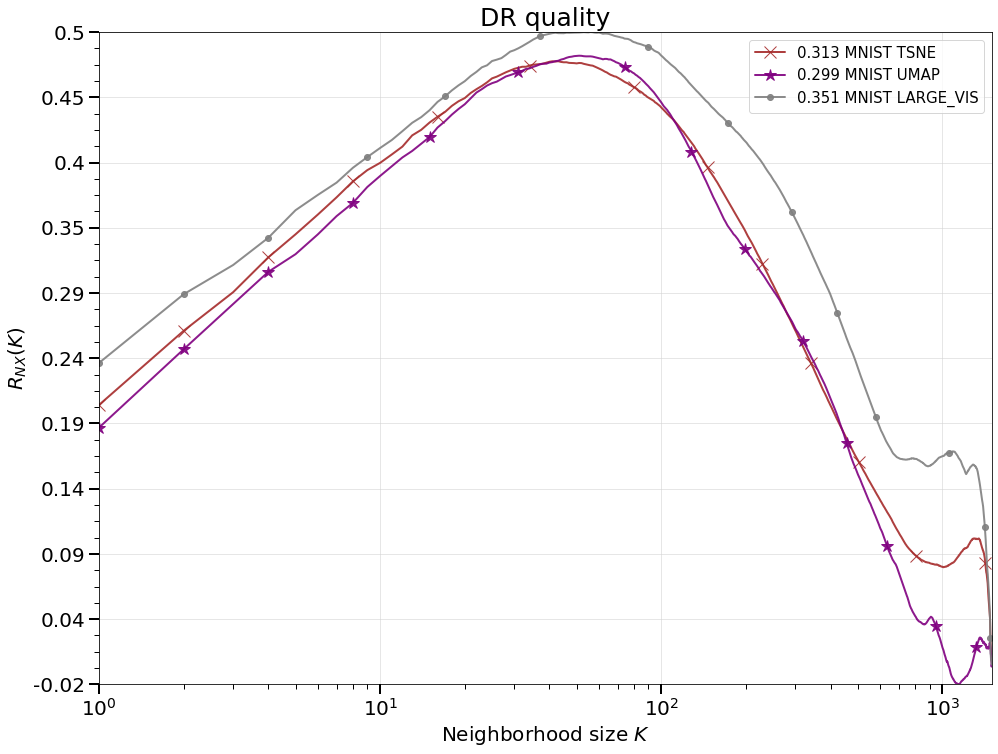

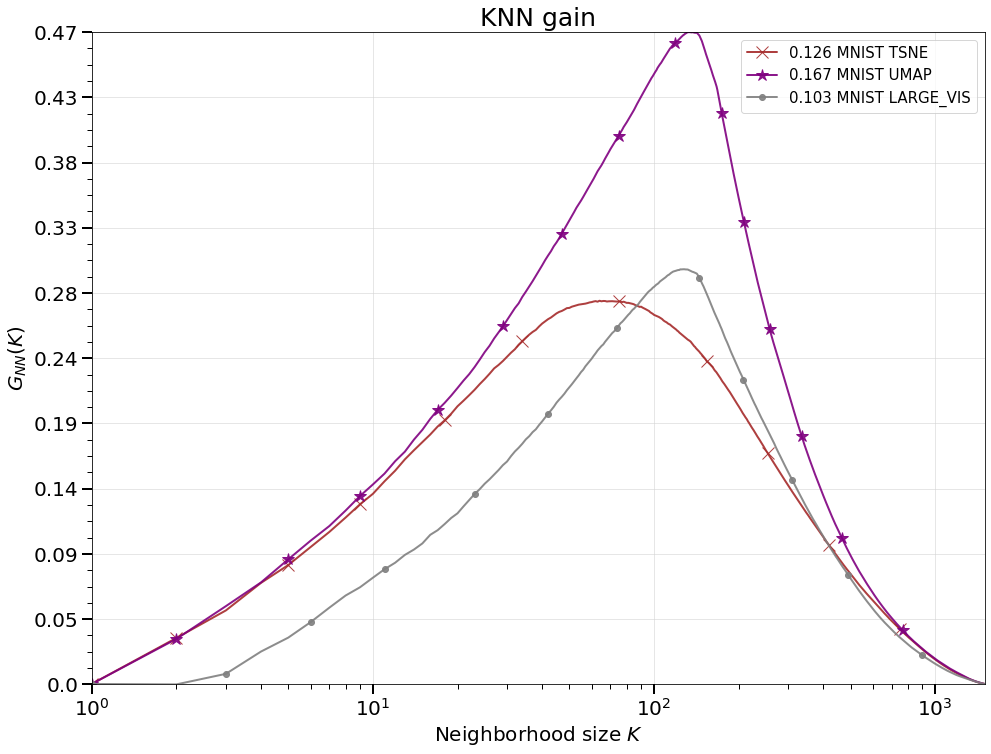

In [34]:
#Apply metrics on mnist dataset
local_metrics = LocalMetric()
for key, value in mnist_result.items():
    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=value,
        X_hds=mnist_df.filter(regex=("^pixel[0-9]*$")).to_numpy(dtype='float32'),
        labels=mnist_df['y'].to_numpy(dtype='int'),
        method_name="{} {}".format('MNIST', key),
    )
local_metrics.visualize()

Zbiór MNIST :
Widać, że dla pewnej wartości sąsiedztwa (10^2) jakość wszystkich metryk się poprawia, po czym zaczyna gwałtownie spadać. Zdecydowanie na plus wyróżnia się metoda UMAP.

Calculating d_hd
MNIST TSNE
Calculating d_hd
MNIST UMAP
Calculating d_hd
MNIST LARGE_VIS
Finished.


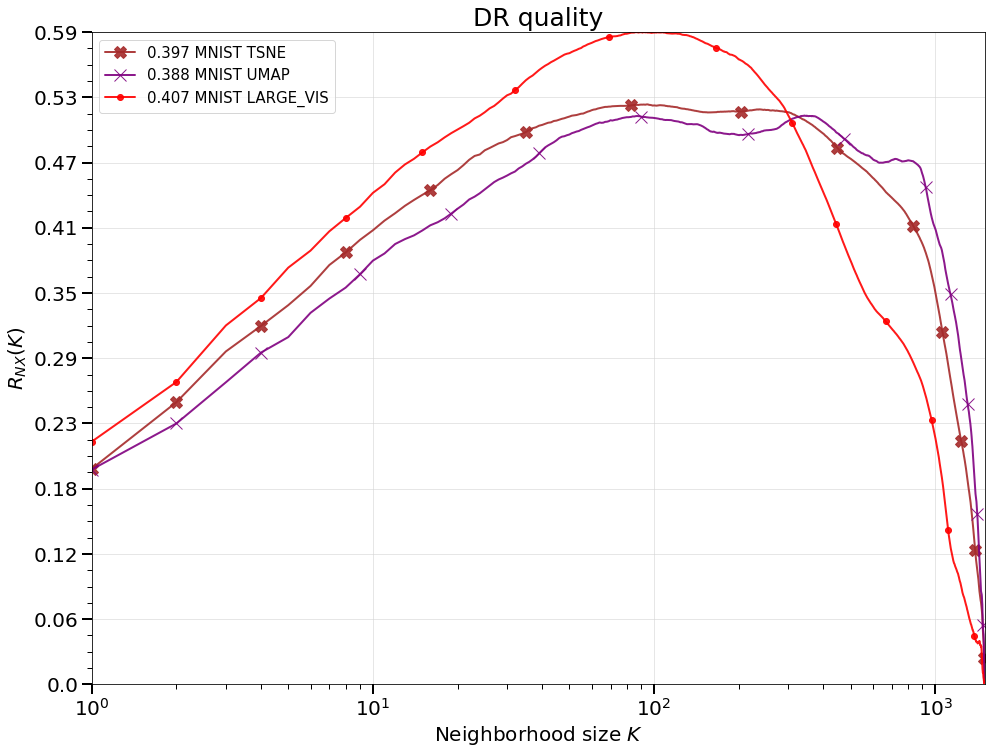

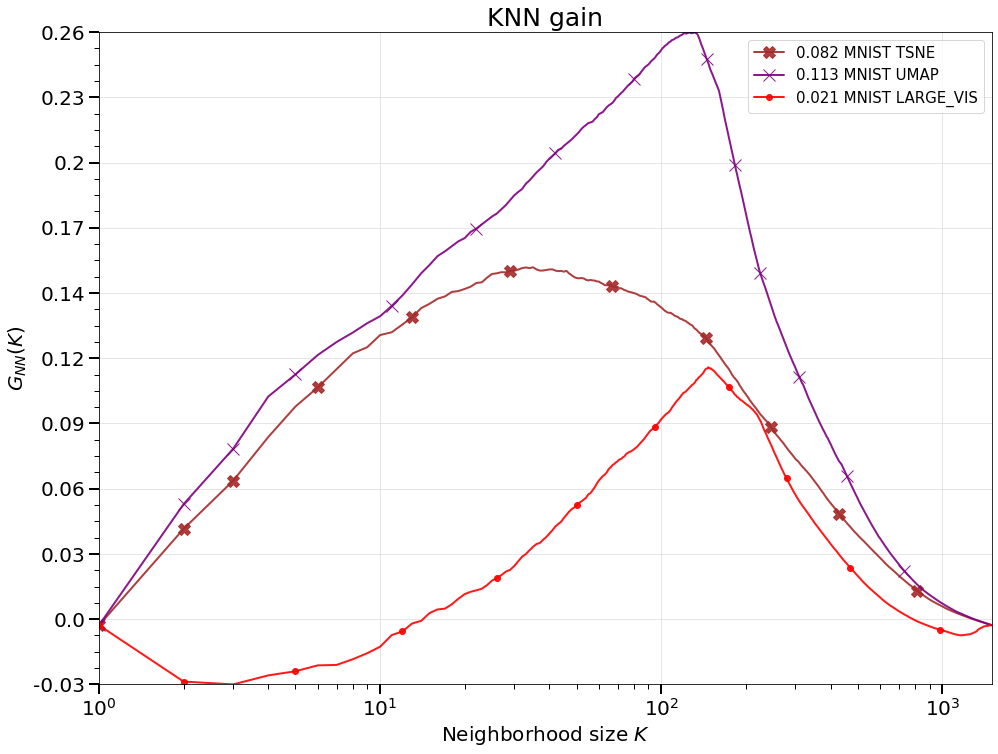

In [35]:
#Apply metrics on mnist dataset
local_metrics = LocalMetric()
for key, value in fashion_mnist_result.items():
    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=value,
        X_hds=fashion_mnist_df.filter(regex=("^pixel[0-9]*$")).to_numpy(dtype='float32'),
        labels=fashion_mnist_df['y'].to_numpy(dtype='int'),
        method_name="{} {}".format('MNIST', key),
    )
local_metrics.visualize()

Zbiór Fashion MNIST :
Widać, że dla pewnej wartości sąsiedztwa (10^2) jakość wszystkich metryk się poprawia, po czym zaczyna gwałtownie spadać. Zdecydowanie na plus wyróżnia się metoda UMAP. Widać pogorszenie metody LargeVis względem zbioru MNIST, można się było spodziewać słabej wartości metryki ze względu na wymieszanie się klas w środkowej części wykresu (wykres kilka punktów wyżej).